In [1]:
import pandas as pd
import itertools

def generate_number_plates(prefix, alpha_len, digit_len):
    alpha1 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    digit1 = '0123456789'

    alpha_comb= itertools.product(alpha1, repeat=alpha_len)
    digit_comb= itertools.product(digit1, repeat=digit_len)

    number_plates = [prefix + ''.join(alpha) + ''.join(digit) for alpha, digit in itertools.product(alpha_comb, digit_comb) if ''.join(digit) != '0000']

    return number_plates

# Example: Generate all combinations for TS08 followed by 2 alphabets and 4 digits
prefix = 'TS08'
alpha_len= 2
digit_len= 4
number_plates = generate_number_plates(prefix, alpha_len, digit_len)

# Company and Models data
company = ['Toyota', 'Honda', 'Nissan', 'Hyundai', 'Tata', 'MG', 'Kia', 'Mahindra', 'Maruti Suzuki', 'Skoda']
models = {
    'Toyota': ['Innova', 'Fortuner', 'Camry', 'Corolla', 'Land cruiser', 'Vellfire'],
    'Honda': ['Amaze', 'Civic', 'Accord', 'Honda City', 'Odyssey', 'Unicorn', 'Ridgeline', 'Pilot'],
    'Nissan': ['KICKS', 'Juke', 'Qashqai', 'Terrano', 'Altima', 'Leaf', 'Pathfinder', 'Rogue', 'Titan'],
    'Hyundai': ['Creta', 'I20', 'I10', 'Tucson', 'Verna', 'Aura', 'Alcazar', 'Nexo', 'Santro', 'Elantra', 'Santa Fe'],
    'Tata': ['Nexon', 'Punch', 'Harrier', 'Safari', 'Tiago', 'Altroz', 'Nano'],
    'MG': ['Gloster', 'Hector', 'Comet EV', 'Astor', 'Hector Plus', 'ZS EV'],
    'Kia': ['Sonet', 'Seltos', 'EV 6', 'Carens'],
    'Mahindra': ['Thar', 'Scorpio', 'XUV700', 'Bolero', 'Bolero Neo', 'XUV300', 'XUV400'],
    'Maruti Suzuki': ['Fronx', 'Grand Vitara', 'Brezza', 'Swift', 'Baleno', 'Ertiga', 'WagonR', 'Alto', 'Dzire'],
    'Skoda': ['Slavia', 'Kushaq', 'Kodiaq', 'Superb', 'Enyaq']
}

# Create a list to store car data
cars = []

# Populate the list with data
import random
for plate, comp in zip(number_plates, itertools.cycle(company)):
    model = random.choice(models[comp] ) # Assuming the first model in the list for simplicity
    color = random.choice(['black','white','blue','lightsteelblue'])  # You can specify the color or leave it as 'Unknown'
    cars.append({'number_plate': plate, 'company': comp, 'model': model, 'color': color})

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(cars)

# Print the DataFrame
df

,number_plate,company,model,color
0,TS08AA0001,Toyota,Innova,lightsteelblue
1,TS08AA0002,Honda,Civic,blue
2,TS08AA0003,Nissan,Titan,black
3,TS08AA0004,Hyundai,Santro,white
4,TS08AA0005,Tata,Tiago,lightsteelblue
...,...,...,...,...
6759319,TS08ZZ9995,Skoda,Slavia,lightsteelblue
6759320,TS08ZZ9996,Toyota,Land cruiser,white
6759321,TS08ZZ9997,Honda,Pilot,white
6759322,TS08ZZ9998,Nissan,Altima,blue


In [7]:
import cv2
import numpy as np
import webcolors


css3_colors = {
    'black': '#000000',
    'white': '#FFFFFF',
    'red': '#FF0000',
    'lime': '#00FF00',
    'blue': '#0000FF',
    'yellow': '#FFFF00',
    'cyan': '#00FFFF',
    'magenta': '#FF00FF',
    'silver': '#C0C0C0',
    'gray': '#808080',
    'maroon': '#800000',
    'olive': '#808000',
    'green': '#008000',
    'purple': '#800080',
    'teal': '#008080',
    'navy': '#000080',
}

def closest_color(requested_color):
    min_colors = {}
    for name, hex_code in css3_colors.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_code)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_car_color(image_path):

    image = cv2.imread(image_path)


    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return None


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    pixels = image_rgb.reshape((-1, 3))


    pixels = np.float32(pixels)


    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


    k = 3


    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


    centers = np.uint8(centers)


    dominant_color = tuple(centers[np.argmax(np.unique(labels, return_counts=True)[1])])


    color_name = closest_color(dominant_color)

    return color_name


image_path = "/content/car image.jpg"
dominant_color_name = get_car_color(image_path)
if dominant_color_name:
    print(f"The dominant color of the car is: {dominant_color_name}")


The dominant color of the car is: silver


In [8]:
import torch

In [9]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 20.8 MB/s eta 0:00:00


In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

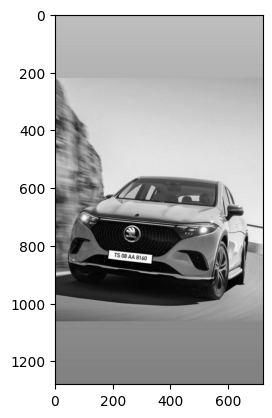

In [12]:
img=cv2.imread("/content/car image.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

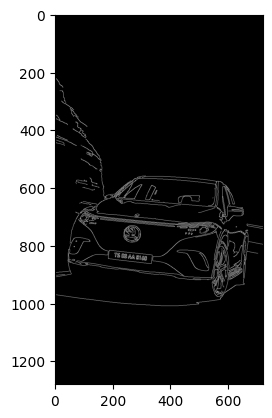

In [13]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [14]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [15]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
       location = approx
       break

In [16]:
location

array([[[187, 817]],

       [[184, 846]],

       [[334, 860]],

       [[336, 833]]], dtype=int32)

In [17]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

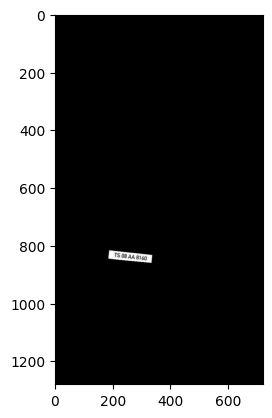

In [18]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [19]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

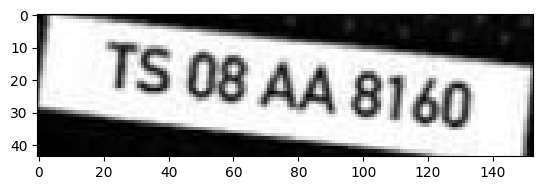

In [20]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [21]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [22]:
print(result)

[([[15, 3], [139, 3], [139, 39], [15, 39]], 'TS 08 AA 8160', 0.9643405352101393)]


In [24]:
orry=result[0][-2]
str= orry.replace(" ", "")
print(str)


TS08AA8160


In [25]:
entered_company = 'Honda'
entered_model = 'Civic'
entered_colour=dominant_color_name
known_digits = result

filtered_df = df[(df['company'] == entered_company) & (df['model'] == entered_model) & (df['color']==  entered_colour)]


print("Filtered DataFrame:")
print(filtered_df)


for index, row in filtered_df.iterrows():
    full_number_plate = row['number_plate']
    if full_number_plate.startswith(known_digits):
        print(f"Complete Number Plate: {full_number_plate}")
        break
else:
    print("No matching complete number plate found.")

Filtered DataFrame:
Empty DataFrame
Columns: [number_plate, company, model, color]
Index: []
No matching complete number plate found.
